<a href="https://colab.research.google.com/github/nadiaamali4/NADIA_DATA/blob/main/Student_Predict_Nadia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT TABEL**

In [ ]:
#menghubungan gdrive untuk mengakses file dari drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#membaca data csv dan dimasukkan ke dalam variabel

url = '/content/drive/MyDrive/PAS MP1/student_performance_prediction.csv'
df = pd.read_csv(url)

df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


#**DATA CLEANSING**

In [ ]:
# melihat ringkasan informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
# menjadikan Student ID sebagai indeks
df = df.set_index('Student ID')

In [ ]:
# melihat jumlah nilai unik
df.nunique()

,0
Study Hours per Week,355
Attendance Rate,1235
Previous Grades,956
Participation in Extracurricular Activities,2
Parent Education Level,5
Passed,2


In [ ]:
# melihat ringkasan statistik deskriptif
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [ ]:
# melihat apakah ada missing value?
df.isna().sum()

,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [ ]:
# Menghapus missing value
df.dropna(inplace=True)
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
Student ID,,,,,,
S00002,9.3,95.3,60.6,No,High School,No
S00004,17.6,76.8,62.4,Yes,Bachelor,No
S00005,8.8,89.3,72.7,No,Master,No
S00006,8.8,73.8,69.3,Yes,High School,Yes
S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...
S39995,5.1,92.1,46.1,Yes,Doctorate,No
S39996,15.6,93.8,51.4,Yes,Master,No
S39997,11.3,66.4,64.2,No,Doctorate,Yes


In [ ]:
#cek ulang apakah masih ada missing value? ternyata tidak
df.isna().sum()

,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


In [ ]:
# melihat apakah ada data duplikat?
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Study Hours per Week'}>,
        <Axes: title={'center': 'Attendance Rate'}>],
       [<Axes: title={'center': 'Previous Grades'}>, <Axes: >]],
      dtype=object)

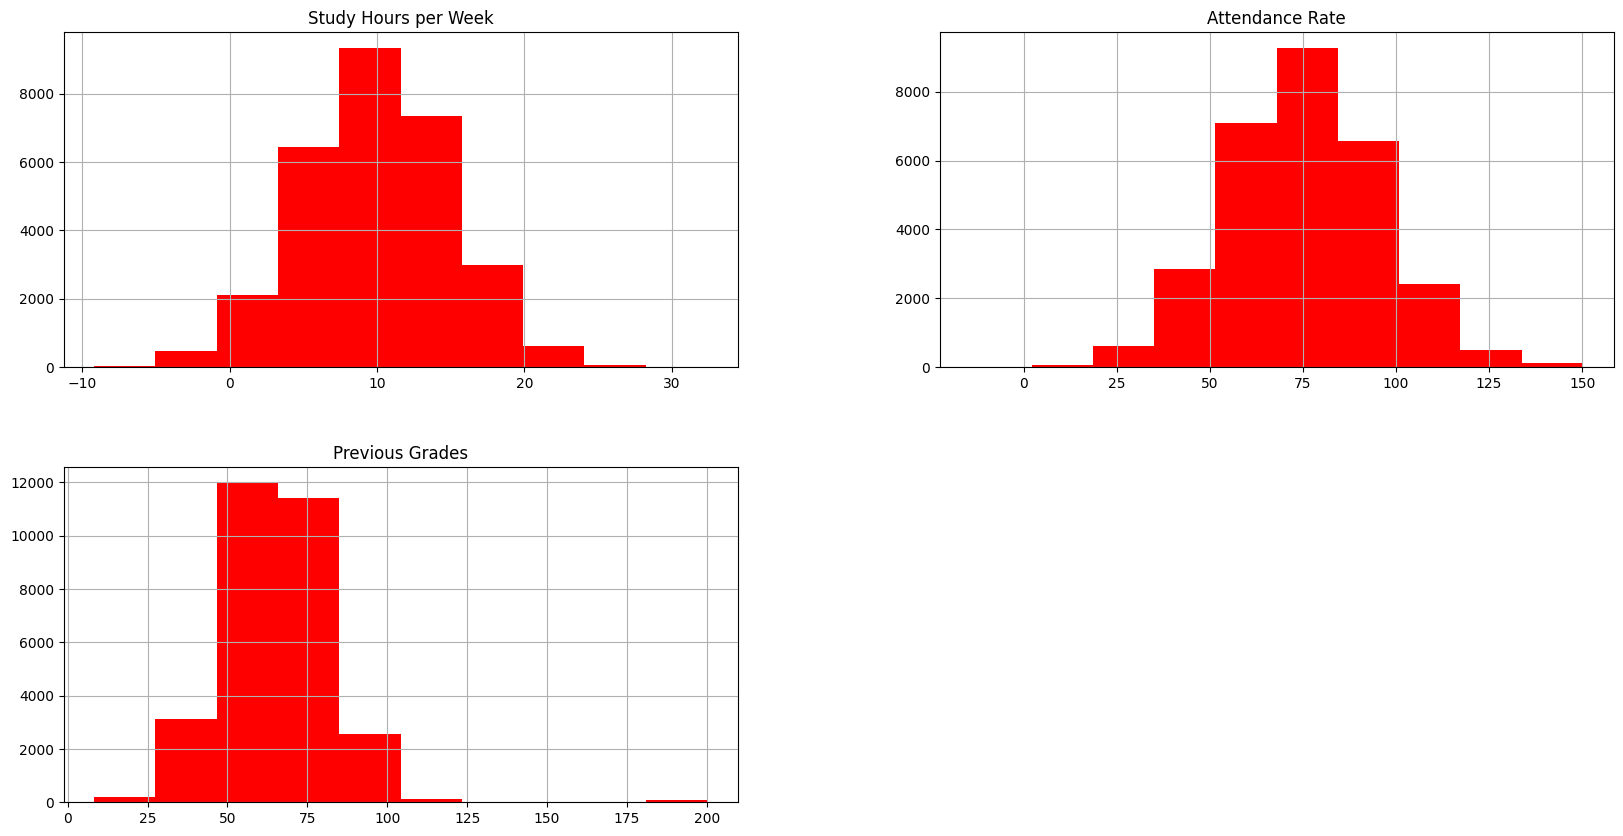

In [ ]:
# melihat distribusi data tiap variabel numerik
df.hist(figsize=(20, 10), color='red')

In [ ]:
# melihat nama kolom dalam data
df.columns

Index(['Study Hours per Week', 'Attendance Rate', 'Previous Grades',
       'Participation in Extracurricular Activities', 'Parent Education Level',
       'Passed'],
      dtype='object')

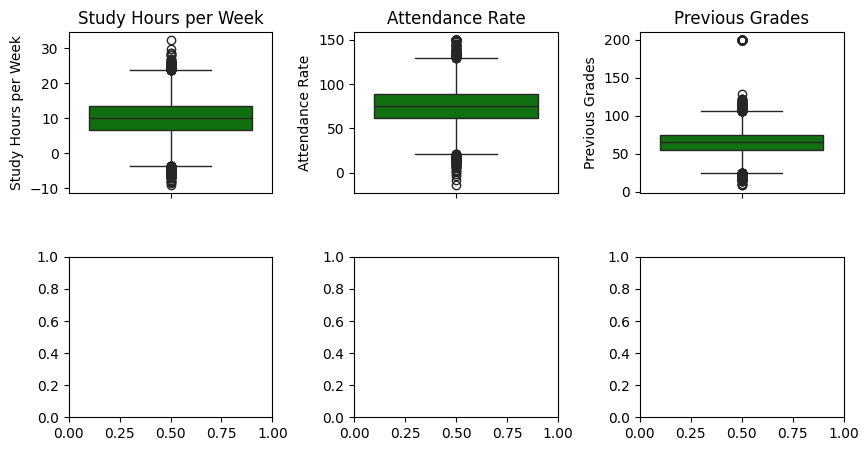

In [ ]:
# cek data outlier
def boxplot(df):
  variables = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

  fig, axes = plt.subplots(2, 3, figsize=(10, 5))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, var in enumerate(variables):
    row, col = i // 3, i%3
    sns.boxplot(y=var, data=df, color='green', ax=axes[row, col])
    axes[row, col].set_title(var)

  plt.show()

boxplot(df)

In [ ]:
# menghapus data outlier

def remove_outlier(df):
  columns = df.select_dtypes(include=['int', 'float']).columns
  cleaned_data = df.copy()
  for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    cleaned_data = cleaned_data[(cleaned_data[column]>=lower_bound)&(cleaned_data[column]<=upper_bound)]

  return cleaned_data

data = remove_outlier(df)
df = data
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
Student ID,,,,,,
S00002,9.3,95.3,60.6,No,High School,No
S00004,17.6,76.8,62.4,Yes,Bachelor,No
S00005,8.8,89.3,72.7,No,Master,No
S00006,8.8,73.8,69.3,Yes,High School,Yes
S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...
S39995,5.1,92.1,46.1,Yes,Doctorate,No
S39996,15.6,93.8,51.4,Yes,Master,No
S39997,11.3,66.4,64.2,No,Doctorate,Yes


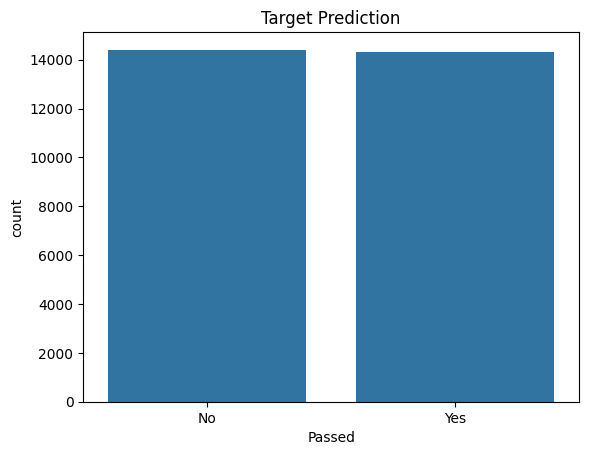

In [ ]:
# melihat target prediksi
sns.countplot(x='Passed', data=df,)
plt.title('Target Prediction');

In [ ]:
# memisahkan fitur (independent variables) dari target (dependent variable)
X = df.drop(columns='Passed')
y = df['Passed']

# **LABEL ENCODER STRING TO NUMERIC**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# proses encoding
le = LabelEncoder()

df['Participation in Extracurricular Activities'] = le.fit_transform(df['Participation in Extracurricular Activities'])
df['Parent Education Level'] = le.fit_transform(df['Parent Education Level'])
df['Passed'] = le.fit_transform(df['Passed'])

In [ ]:
# melihat datatype apakah sudah ke encoder
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28733 entries, S00002 to S40000
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         28733 non-null  float64
 1   Attendance Rate                              28733 non-null  float64
 2   Previous Grades                              28733 non-null  float64
 3   Participation in Extracurricular Activities  28733 non-null  int64  
 4   Parent Education Level                       28733 non-null  int64  
 5   Passed                                       28733 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 2.5+ MB


# **TRAINING/ KOLOM TARGET & FEATURES**

In [ ]:
X_train = np. array (df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades',
       'Participation in Extracurricular Activities', 'Parent Education Level']]) # features
y_train = np. array (df['Passed']) # target

# menampilkan isi data input & output
print(f'X_train: {X_train}\n')
print(f'y_train: {y_train}')

X_train: [[ 9.3 95.3 60.6  0.   3. ]
 [17.6 76.8 62.4  1.   1. ]
 [ 8.8 89.3 72.7  0.   4. ]
 ...
 [11.3 66.4 64.2  0.   2. ]
 [13.1 65.6 38.1  0.   1. ]
 [11.8 55.1 68.5  0.   1. ]]

y_train: [0 0 0 ... 1 0 1]


# **KKN CLASIFIER**

In [ ]:
# TRAINING KNN KOLOM FEATURES SEBAGAI X TRAIN DAN TARGET MENJADI Y TRAIN
# menentukan berapa jumlab tetangga terdekat

from sklearn.neighbors import KNeighborsClassifier

k = 7
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

# **PREDICT**

In [ ]:
# melakuka prediksi lulus atau tidak
Study_Hours_per_Week = 7.1
Attendance_Rate = 7.4
Previous_Grades = 60
Participation_in_Extracurricular_Activities = 1
Parent_Education_Level = 3

x_new = np.array([[Study_Hours_per_Week, Attendance_Rate, Previous_Grades, Participation_in_Extracurricular_Activities, Parent_Education_Level]]).reshape(1, -1)
x_new

array([[ 7.1,  7.4, 60. ,  1. ,  3. ]])

In [ ]:
# hasil prediksi
y_new = model.predict(x_new)
y_new

array([0])

In [ ]:
# mengingat hasil 0 itu untuk yes or no
le.inverse_transform(y_new)

array(['No'], dtype=object)

# **EUCLEDIAN**

In [ ]:
# menambahkan misterius
misterius = np.array([Study_Hours_per_Week, Attendance_Rate, Previous_Grades, Participation_in_Extracurricular_Activities_encoded, Parent_Education_Level_encoded])
misterius

array([ 7.1,  7.4, 60. ,  1. ,  3. ])

In [ ]:
# menampilkan features dari data training
X_train

array([[ 9.3, 95.3, 60.6,  0. ,  3. ],
       [17.6, 76.8, 62.4,  1. ,  1. ],
       [ 8.8, 89.3, 72.7,  0. ,  4. ],
       ...,
       [11.3, 66.4, 64.2,  0. ,  2. ],
       [13.1, 65.6, 38.1,  0. ,  1. ],
       [11.8, 55.1, 68.5,  0. ,  1. ]])

In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

# bagian ini gunanya buat ngitung jarak antara 'data misterius' kita sama setiap data yang ada di X_train (data latihan).
# pakai rumus 'euclidean' buat ngitung jaraknya,
# hasilnya (jarak-jarak itu) kita masukin ke 'data_jarak'.
# jadi, 'data_jarak' itu isinya daftar jarak dari 'data misterius' ke setiap titik di data latihan.

[87.93526027709248,
 70.25930543351535,
 82.90832286326867,
 67.06966527425047,
 47.12791105067144,
 88.66278813572241,
 98.06253107074076,
 48.3170777262036,
 109.7288020530617,
 60.431283289369254,
 47.17859684221225,
 74.2059970622321,
 87.62933298844628,
 70.01778345534797,
 80.92861051568845,
 103.7854035980012,
 67.82683834589373,
 73.90730681062595,
 92.5873641486785,
 48.92044562348139,
 61.08387675974733,
 89.0946126317411,
 64.96006465514023,
 104.79246156093481,
 39.506202044742295,
 75.06863526133934,
 39.19693865597159,
 58.21958433379613,
 54.1551474931054,
 63.340271549781036,
 45.286421806099895,
 66.35796862472509,
 77.78181021292832,
 57.72122659819349,
 118.46037312114122,
 36.988917259092624,
 39.74783012945487,
 72.21121796507796,
 79.342548484404,
 112.15752315382147,
 120.61484154116359,
 65.73507435152105,
 87.58852664590265,
 55.6133077599238,
 107.87464947799366,
 76.5924278241655,
 72.81764895957572,
 65.06865604882276,
 73.55814027012917,
 44.12448299980409,

In [ ]:
df['jarak'] = data_jarak
df.sort_values(['jarak'])

# di sini, kita nambahin kolom baru di tabel (df) yang namanya 'jarak' berisi data jarak yang udah kita hitung sebelumnya.
# terus kita urutin tabelnya berdasarkan kolom 'jarak' ini, dari yang paling kecil (terdekat) sampai yang paling gede (terjauh).
# jadi, sekarang kita bisa lihat data-data mana aja yang paling deket sama 'data misterius' kita.

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,jarak
Student ID,,,,,,,
S05412,7.4,21.8,61.6,1,1,0,14.629081
S21944,9.7,22.0,58.5,1,4,0,14.938875
S36642,4.3,22.1,60.4,1,2,1,15.003000
S07911,11.7,21.2,63.4,1,1,1,15.071828
S09173,13.2,21.0,60.9,0,1,0,15.099007
...,...,...,...,...,...,...,...
S22561,9.6,129.5,83.1,1,2,1,124.295092
S05062,15.2,128.8,86.1,0,0,1,124.478030
S22964,8.7,127.0,95.9,1,2,1,124.886068


# **Evaluasi Perhitungan**

# TESTING SET

In [ ]:
# splitting data dengan membagi 80% data train dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menampilkan hasil pemisahan
print("Data Training (X_train):")
print(X_train)
print("\nLabel Training (y_train):")
print(y_train)

print("\nData Testing (X_test):")
print(X_test)
print("\nLabel Testing (y_test):")
print(y_test)

Data Training (X_train):
            Study Hours per Week  Attendance Rate  Previous Grades  \
Student ID                                                           
S16208                       7.7             97.1             34.7   
S00801                      14.7             71.1             69.0   
S06940                       3.5             72.7             82.1   
S09385                       6.4             69.9             64.5   
S38275                      14.2             64.6             68.8   
...                          ...              ...              ...   
S30115                      20.0             96.7             70.0   
S07530                      -0.2             53.1             75.7   
S01184                       2.1             69.6             65.8   
S22110                      16.1             83.1             71.1   
S32933                      17.9             68.1             47.1   

           Participation in Extracurricular Activities Parent Ed

# Akurasi

In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X = np.array(df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades', 'Participation in Extracurricular Activities', 'Parent Education Level']])
y = lb.transform(np.array(df['Passed'])).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Membagi data di sini

# Sekarang, 'y_pred' dan 'y_train' harus memiliki bentuk yang konsisten
y_pred = model.predict(X_train)

# Menghitung akurasi
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred)
print(f'Akurasi: {acc}')

Akurasi: 0.6595734102321882


# Precission

In [ ]:
from sklearn.metrics import precision_score

prec = precision_score(y_train, y_pred)
print(f'Precision: {prec}')

# Bagian ini buat ngitung 'precision' dari model kita.
# Sederhananya, 'precision' itu ngukur seberapa akurat model kita dalam nebak data yang positif.

Precision: 0.6604410888138287


# Recal

In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_train, y_pred, average='macro')
print(f'Recall: {rec}')
# bagian ini buat ngitung 'recall' dari model kita.
# 'Recall' itu ngukur seberapa jago model kita dalam nemuin semua data yang positif.

Recall: 0.659573110484898


# F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred, average='macro')
print(f'F1 Score: {f1}')

# Bagian ini buat ngitung 'F1 Score' dari model kita.
# 'F1 Score' itu kayak gabungan dari 'precision' dan 'recall'.
# Dia ngasih kita nilai yang seimbang antara keduanya.
# Ada tambahan 'average='macro'' buat ngitung F1 Score rata-rata.

F1 Score: 0.6595726528532169


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(y_train, y_pred)
print(f'Classification Report:\n{class_report}')

# bagian ini buat ngasih kita laporan lengkap tentang performa model kita.

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     10036
           1       0.66      0.66      0.66     10077

    accuracy                           0.66     20113
   macro avg       0.66      0.66      0.66     20113
weighted avg       0.66      0.66      0.66     20113



# Matthews Correlation Coeffcient (MCC)

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_train, y_pred)
print(f'MCC: {mcc}')

# ngitung 'MCC' buat nilai performa model secara keseluruhan,

MCC: 0.3191457002780702


# **VISUALISASI FIX**

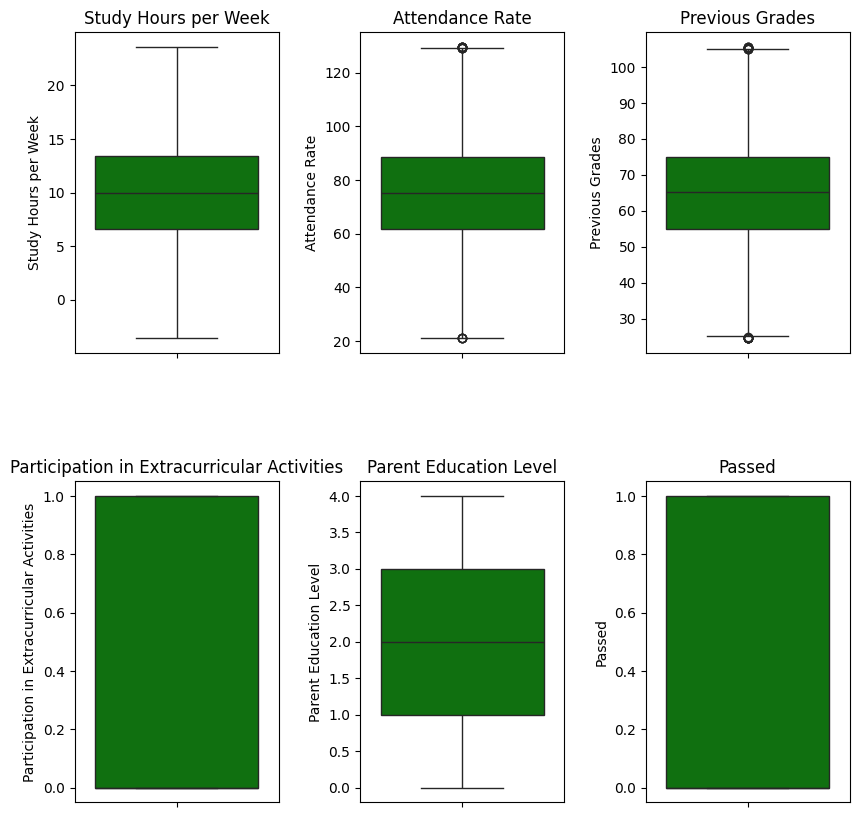

In [ ]:
def boxplot(df):
  variables = ['Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level','Passed']

  fig, axes = plt.subplots(2, 3, figsize=(10, 10))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, var in enumerate(variables):
    row, col = i // 3, i%3
    sns.boxplot(y=var, data=df, color='green', ax=axes[row, col])
    axes[row, col].set_title(var)

  plt.show()

boxplot(df)

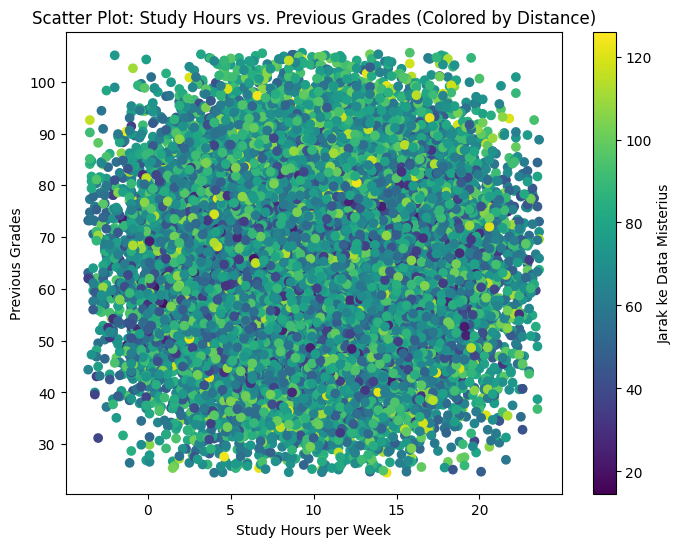

In [ ]:
#SCATTER PLOT DENGAN MISTERIUS

plt.figure(figsize=(8, 6))
plt.scatter(df['Study Hours per Week'], df['Previous Grades'], c=df['jarak'], cmap='viridis')  # Use 'jarak' for color
plt.colorbar(label='Jarak ke Data Misterius')
plt.title('Scatter Plot: Study Hours vs. Previous Grades (Colored by Distance)')
plt.xlabel('Study Hours per Week')
plt.ylabel('Previous Grades')
plt.show()